In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
CUSTOMERS_DP = "data/customers.csv"
ARTICLES_DP = "data/articles.csv"
IMAGES_DP = "data/images"
TRANSACTIONS_DP = "data/transactions_train.csv"

In [8]:
customers = pd.read_csv(CUSTOMERS_DP)
articles = pd.read_csv(ARTICLES_DP)
transactions = pd.read_csv(TRANSACTIONS_DP)

# Exploratory Data Analysis
## Customer Data

In [13]:
print(f"We have a total of {customers.shape[0]} customers")

We have a total of 1371980 customers


### Data Description
We have 7 columns in the customer data
1. customer_id - Unique ID for each customer
2. FN - Speical status tracked by H&M (is 1 or NaN)
3. Active - Special status tracked by H&M (is 1 or NaN)
4. club_member_status - H&M club status of the customer. Can be active, pre-active or left-club
5. fashion_news_frequency -  frequency of sending communication to the customer. Can be Regularly, Monthly, None, N/A,NONE
6. age - Age of the customer
7. postal_code - Postal Code of the customer

### Missing Data

In [14]:
print(f"Number of rows with missing data per column")
print(customers.isna().sum())

Number of rows with missing data
customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64


For FN and Active since they are 1 or NaN we can set NaN to 0.

In [15]:
customers[['FN','Active']] = customers[['FN','Active']].fillna(0)

0.0    895050
1.0    476930
Name: FN, dtype: int64


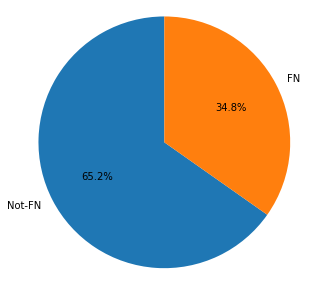

In [22]:
def create_piechart(df,column,labels,figsize=(5,5)):
    fig,ax = plt.subplots(figsize=figsize)
    ax.pie(df[column].value_counts(),labels=labels, autopct='%1.1f%%',startangle=90)
    ax.axis("equal")
print(customers.FN.value_counts())
create_piechart(customers,"FN",["Not-FN","FN"])

We can see that 34.8% (476930) customers have the FN flag set to true while 65.2% (895050) of them have it set to false.

0.0    907576
1.0    464404
Name: Active, dtype: int64


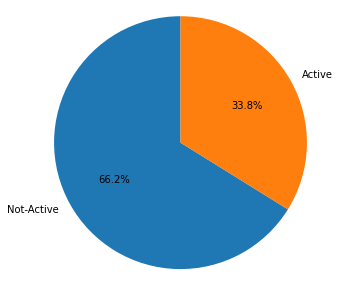

In [23]:
print(customers.Active.value_counts())
create_piechart(customers,"Active",["Not-Active","Active"])

Similarly we can see that 33.8% (464404) customers have the FN flag set to true while 66.2% (907576) of them have it set to false.

For customers with missing club_membership_status we can think of these people as customers who did not take a membership.

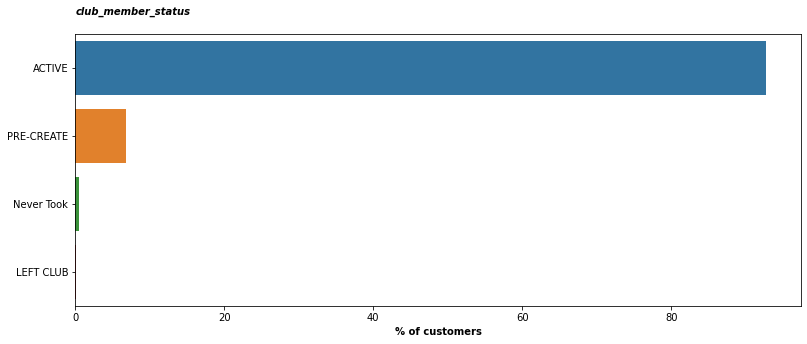

In [34]:
def create_barplot(df,col,figsize=(13,5),pct=False,label='customers'):
    fig, ax = plt.subplots(figsize=figsize)
    if pct:
        data = df[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index')
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col)
        ax.set_xlabel('# of articles' + label)
        
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
customers['club_member_status'] = customers['club_member_status'].fillna('Never Took')   
create_barplot(customers, 'club_member_status', pct=True)

We can see that most of the customers are Active club members with a small minority still creating their membership or left the club. We can also see that the percentage of people with no club status is very small.

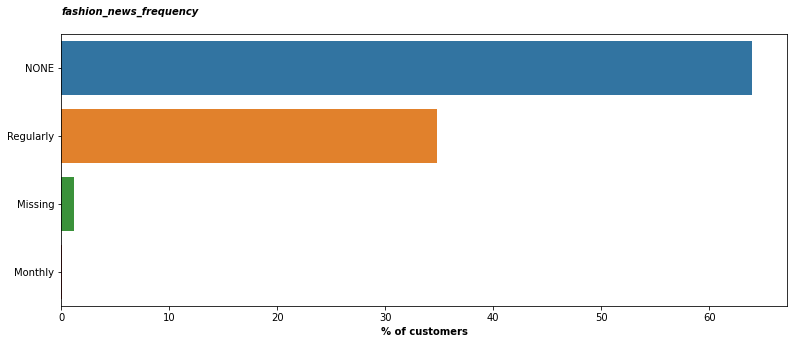

In [36]:
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('Missing')
customers['fashion_news_frequency'].replace("None","NONE",inplace=True)
create_barplot(customers, 'fashion_news_frequency', pct=True, label='customers')

For fashion_news_frequncy, we can see that there are two labels for None which we can condense into one layer to reduce dimensionality in the data. For the missing data there is no way to infer this data and since it is a small percentage (less than 5) we can drop these rows before training if required.

We can also notice that majority of the customers recieve no communication from H&M

In [88]:
def create_hist(df,column,figsize=(10,5),bins = 50):
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.histplot(data=df, x=column, bins=bins, stat="percent")
    ax.set_xlabel(f'Distribution of the customers {column}')
    median = df[column].median()
    ax.axvline(x=median, color="green", ls="--")
    mean = df[column].mean()
    ax.axvline(x=mean, color="red", ls="--")
    ax.text(median, 3.5, 'median: {}'.format(round(median,1)), rotation='vertical', ha='right')
    ax.text(mean, 3.5, 'mean: {}'.format(round(mean,1)), rotation='vertical', ha='right')
    ax.text(12, 5.5, 'Distribution of customers age', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')

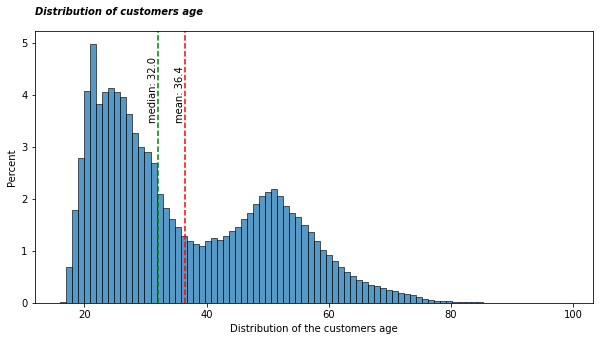

In [89]:
create_hist(customers,'age',bins = customers["age"].nunique())

The distribution of the customers age looks like a bimodal guassian distribution. With the mean of the data at 36.4 years and median at 32 years old

## Articles

In [46]:
print(f"We have a total of {articles.shape[0]} articles")

We have a total of 105542 articles


### Data Description

We have a total of 25 columns in this dataset
1. article_id - an unique 9-digit identifier of the article.
2. product_code - 6-digit product code (the first 6 digits of article_id)
3. prod_name - name of a product
4. product_type_no - product type number
5. product_type_name - name of a product type, equivalent of product_type_no
6. product_group_name - name of a product group, in total 19 groups
7. graphical_appearance_no - code of a pattern
8. graphical_appearance_name - name of a pattern
9. colour_group_code - code of a color
10. colour_group_name - name of a color
11. perceived_colour_value_id - perceived color id
12. perceived_colour_value_name - perceived color name
13. perceived_colour_master_id - perceived master color
14. perceived_colour_master_name - perceived master color name
15. department_no - department number
16. department_name - department name
17. index_code - index code
18. index_name - index name
19. index_group_no - index group code
20. index_group_name - index group code
21. section_no - section number
22. section_name - section name
23. garment_group_n - section number
24. garment_group_name - section name
25. detail_desc - detailed description of the item

### Missing Data

In [52]:
print(f"Number of rows with missing data per column")
print(articles.isna().sum())

Number of rows with missing data per column
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


Detailed description is the only field with missing data for articles.

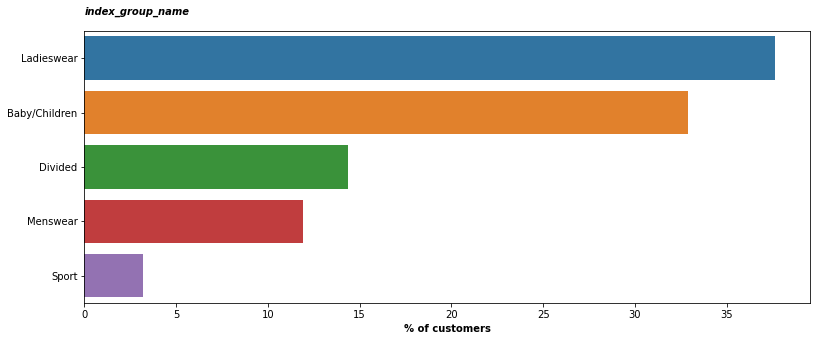

In [54]:
create_barplot(articles, 'index_group_name', pct=True)

Most of the articles are in categories (index) of Ladieswear and Baby/Children. The smallest amount of articles is in Sport group.

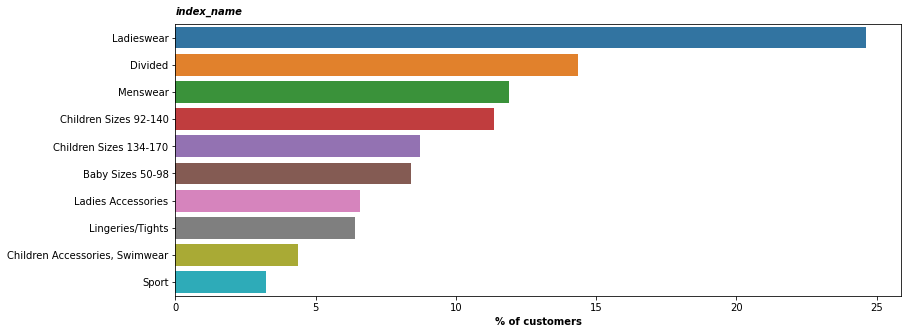

In [57]:
create_barplot(articles, 'index_name', pct=True)

We can see that even with index_name Ladieswear is on the top. However instead of Children/Baby we have Divided as the second largest group. (Divided are articles with multiple instances such as gloves or socks etc)

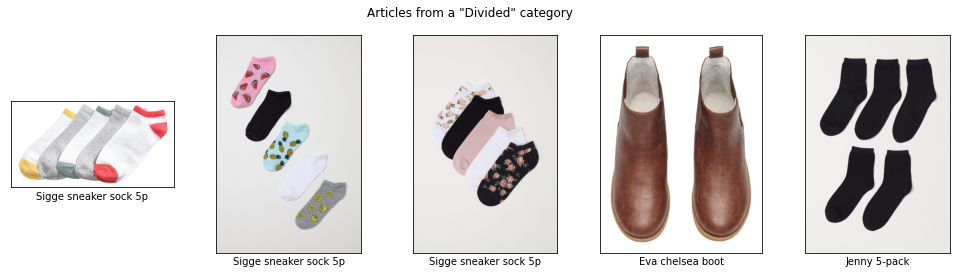

In [64]:
def show_images(df,column, value, no_imgs=4, title=None, figsize=(17,4)):
    data = df[df[column]==value]
    cat_ids = data['article_id'].iloc[:no_imgs].to_list()
    fig, ax = plt.subplots(1, no_imgs,figsize=figsize)
    for i, prod_id in enumerate(cat_ids):
        folder = str(prod_id)[:2]
        file_path = f'{IMAGES_DP}/0{folder}/0{prod_id}.jpg'
        img = plt.imread(file_path)       
        ax[i].imshow(img, aspect='equal')
        ax[i].grid(False)
        ax[i].set_xticks([], minor=[])
        ax[i].set_yticks([], minor=[])
        ax[i].set_xlabel(df[df['article_id']==int(prod_id)]['prod_name'].iloc[0])        
    fig.suptitle(title)
show_images(articles,'index_name', 'Divided', 5, 'Articles from a "Divided" category')


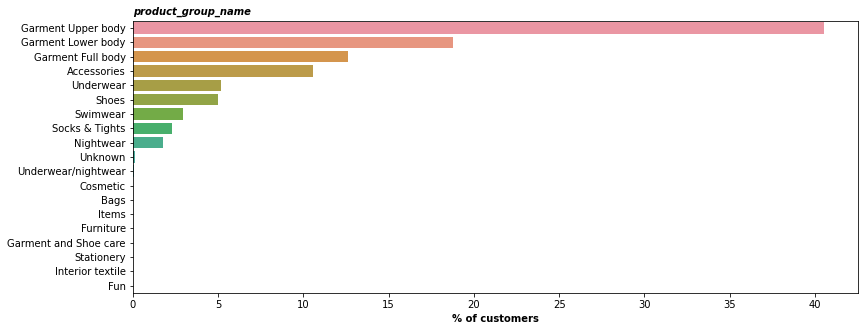

In [65]:
create_barplot(articles, 'product_group_name', pct=True)


The hierarhy of categories is: index_group --> index --> group --> type </br>
Over 80% of the products lays in 4 product groups (out of 19)

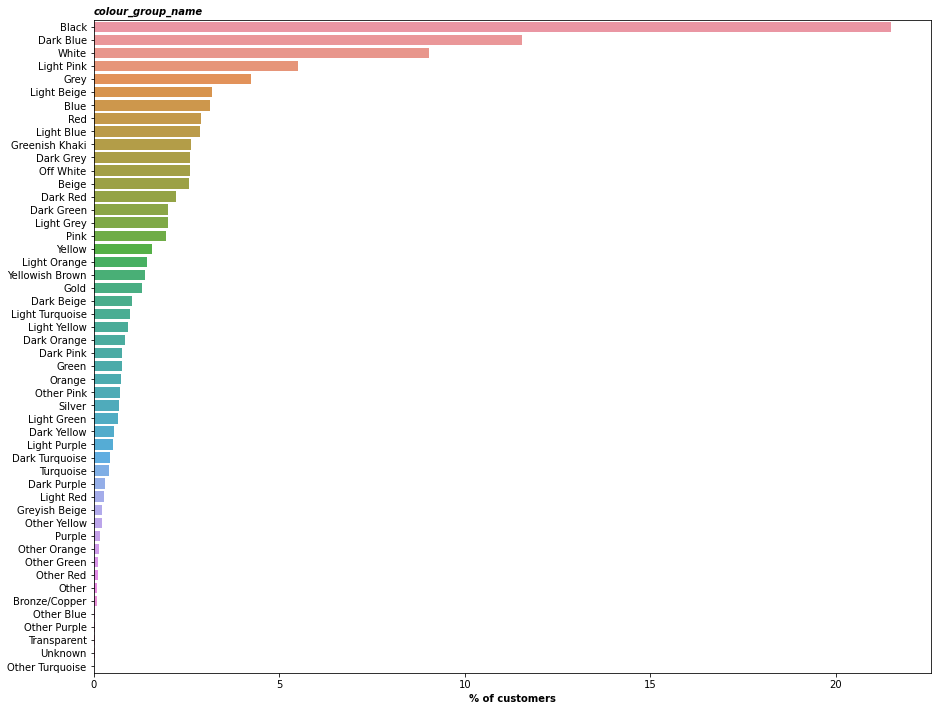

In [66]:
create_barplot(articles, 'colour_group_name', figsize=(15,12), pct=True)

We can see that the colors are more spread out compared to product groups

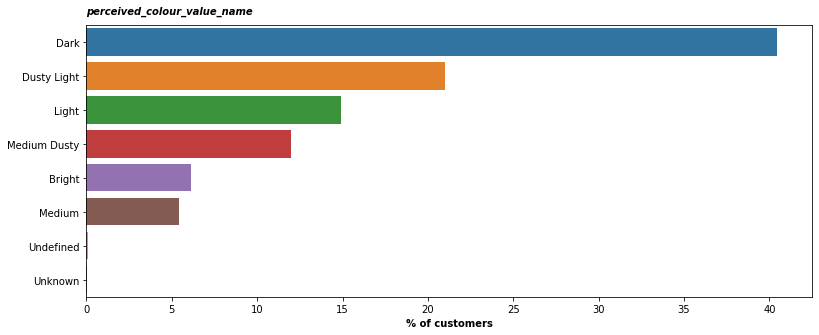

In [70]:
create_barplot(articles, 'perceived_colour_value_name', pct=True)

We can see some medium color articles below

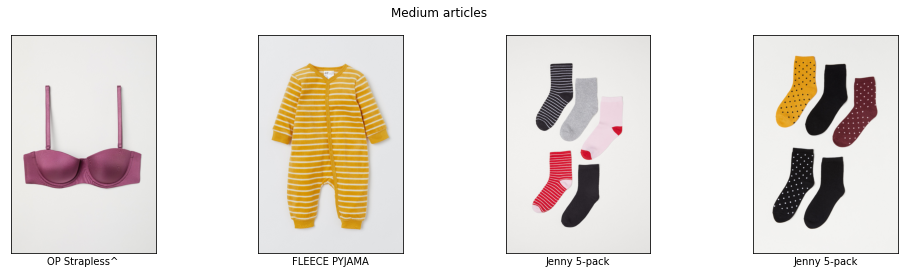

In [74]:
show_images(articles,'perceived_colour_value_name', 'Medium',4 , 'Medium articles')

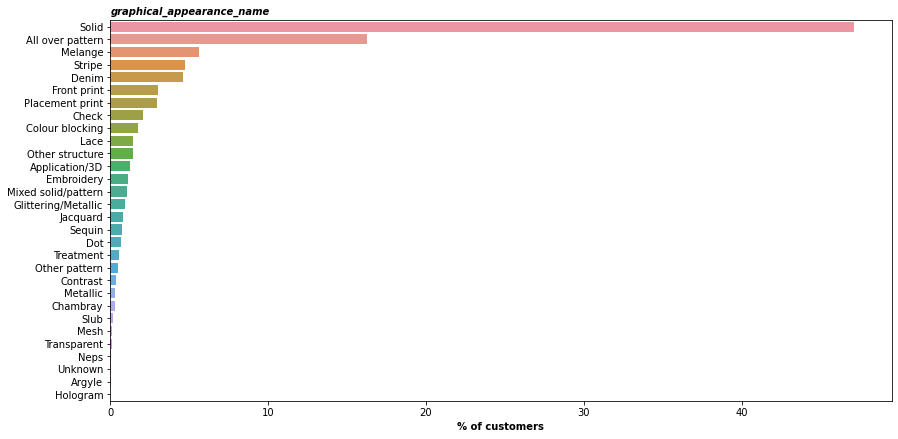

In [77]:
create_barplot(articles, 'graphical_appearance_name', figsize=(14,7), pct=True)

Majority of the articles fall under Solid graphical appearance. Some examples of these articles are shown below

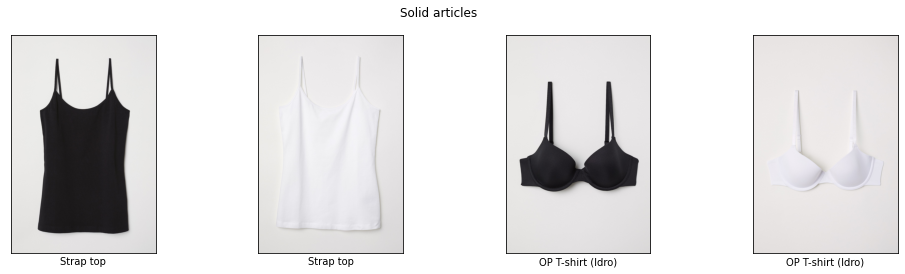

In [78]:
show_images(articles,'graphical_appearance_name', 'Solid',4 , 'Solid articles')

Let us see some item descriptions

In [79]:
articles['detail_desc'].drop_duplicates().to_list()[:10]

['Jersey top with narrow shoulder straps.',
 'Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.',
 'Semi shiny nylon stockings with a wide, reinforced trim at the top. Use with a suspender belt. 20 denier.',
 'Tights with built-in support to lift the bottom. Black in 30 denier and light amber in 15 denier.',
 'Semi shiny tights that shape the tummy, thighs and calves while also encouraging blood circulation in the legs. Elasticated waist.',
 'Opaque matt tights. 200 denier.',
 'Sweatshirt in soft organic cotton with a  press-stud on one shoulder (sizes 12-18 months and 18-24 months without a press-stud). Brushed inside.',
 'Two soft bandeau bras in soft jersey with side support and a silicone trim at the top.',
 'Fitted top in soft stretch jersey with a wide neckline and long sleeves.',
 'Trousers 

## Transactions

In [80]:
print(f"We have a total of {transactions.shape[0]} transactions")

We have a total of 31788324 transactions


### Data Descriptions

We have 5 columns
1. t_dat - date of transaction (format YYYY-MM-DD)
2. customer_id - id of the customer (key to join with customers data)
3. article_id - id of the article (key to join with articles data)
4. price - price paid by the customer
5. sales_channel_id - what channel was the sale made through. Can have two values (1,2)

### Missing Data

In [82]:
print(f"Number of rows with missing data per column")
print(transactions.isna().sum())

Number of rows with missing data per column
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


There is no missing data in transaction!

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64


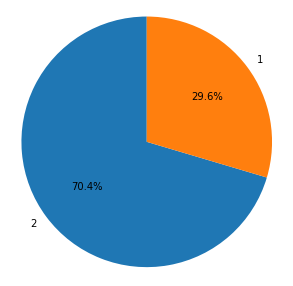

In [85]:
print(transactions.sales_channel_id.value_counts())
create_piechart(transactions,"sales_channel_id",["2","1"])

We can see that 70.4% (22379862) of the transaction happen through channel 2 and the rest 29.6% (9408462) happen through channel 1

Text(0.5, 0, 'Distribution of the price')

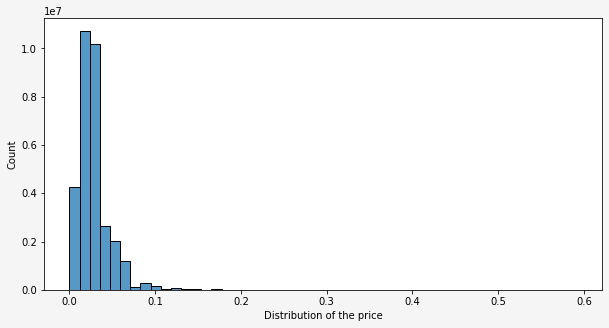

In [95]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
ax = sns.histplot(data=transactions, x='price', bins=50)
ax.set_xlabel('Distribution of the price')

The price distribution looks like a right skewed gaussian distribution. We can take the log of this feature to have a more guassian feature

Text(0.5, 0, 'Distribution of the log of price')

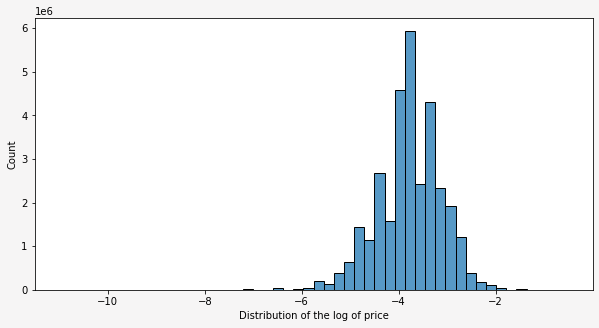

In [100]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
ax = sns.histplot(data=np.log(transactions.price), bins=50)
ax.set_xlabel('Distribution of the log of price')

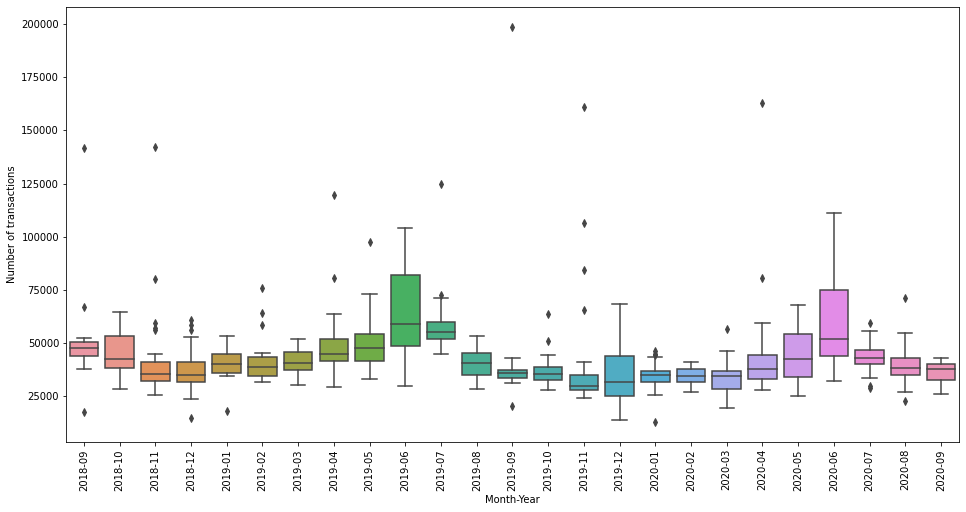

In [104]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
trans_gr_month = transactions.groupby('t_dat').size().rename("no_transactions")
trans_gr_month = trans_gr_month.reset_index()
trans_gr_month['month_year'] = trans_gr_month['t_dat'].dt.to_period('M')
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x="month_year", y='no_transactions', data=trans_gr_month)
plt.xticks(rotation=90)
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of transactions')
plt.show()

The bar chart above show us that per day usuall number of transactions lays in range about between 25 000 and 80 000 transactions per day. We see also that sales spikes during summertime and drops during winter.


References
1. https://www.kaggle.com/code/datark1/detailed-eda-understanding-h-m-data#3.-Transactions